In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    #fig = plt.gcf()
    fig.set_size_inches(7,7)
    #ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

In [3]:
def bmw_finder(mileage, price):
    if price > 25000:
        return 1
    else:
        return 0

In [4]:
from car_data import bmws, priuses

In [5]:
all_car_data = []
for bmw in bmws:
    all_car_data.append((bmw.mileage, bmw.price, 1))
for priuse in priuses:
    all_car_data.append((priuse.mileage, priuse.price, 0))

In [6]:
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

In [7]:
def test_classifier(classifier, data, verbose=False):
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives= 0
    for mileage, price, is_bmw in data:
        predicted = classifier(mileage, price)
        if predicted and is_bmw:
            true_positives += 1 
        elif predicted:
            false_positives += 1
        elif is_bmw:
            false_negatives += 1
        else:
            true_negatives += 1
    if verbose:
        print("true positives %f" % true_positives)
        print("false positives %f" % false_positives)
        print("true negatives %f" % true_negatives)
        print("false negatives %f" % false_negatives)
    total = true_positives + true_negatives
    return total / len(data)

In [8]:
test_classifier(bmw_finder, all_car_data, True)

true positives 18.000000
false positives 0.000000
true negatives 100.000000
false negatives 82.000000


0.59

In [9]:
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

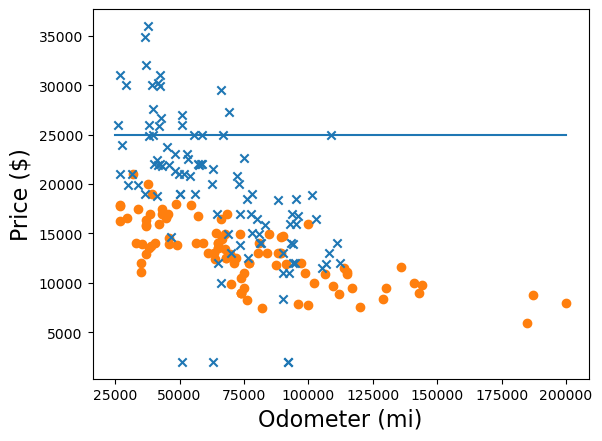

In [10]:
plot_data(all_car_data)
plot_function(lambda x:25000, 25000, 200000)

In [11]:
def decision_boundary_classify(mileage, price):
    if price > 21000 - 0.07 * mileage:
        return 1
    else:
        return 0

In [12]:
test_classifier(decision_boundary_classify, all_car_data)

0.805

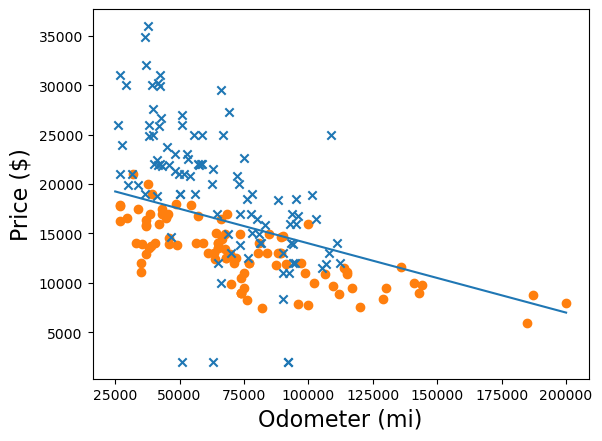

In [13]:
plot_data(all_car_data)
plot_function(lambda x:21000-0.07*x, 25000, 200000)

## Exercise 15.2.4

In [15]:
def constant_price_classsifier(cutoff_price):
    def c(x, p):
        if p > cutoff_price:
            return 1
        else:
            return 0
    return c

def cutoff_accuracy(cutoff_price):
    c = constant_price_classsifier(cutoff_price)
    return test_classifier(c, all_car_data)

In [16]:
all_prices = [data[1] for data in all_car_data ]
max(all_prices, key=cutoff_accuracy)

17998.0

In [17]:
cutoff_accuracy(17998.0)

0.795

In [18]:
def make_scale(data):
    min_val = min(data)
    max_val = max(data)
    def scale(x):
        return (x - min_val) / (max_val - min_val)
    def unscale(y):
        return y * (max_val - min_val) + min_val
    return scale, unscale

In [19]:
price_scale, price_unscale = make_scale([x[1] for x in all_car_data])
mileage_scale, mileage_unscale = make_scale([x[0] for x in all_car_data])

In [20]:
scaled_car_data = [(mileage_scale(mileage), price_scale(price), is_bmw) for mileage, price, is_bmw in all_car_data]

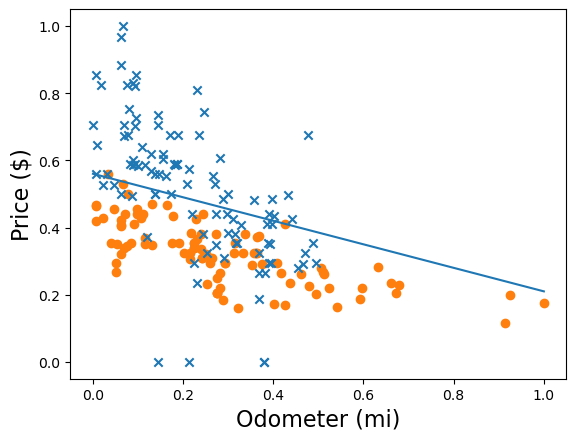

In [21]:
plot_data(scaled_car_data)
plot_function(lambda x: 0.56-0.35*x, 0, 1)

In [22]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

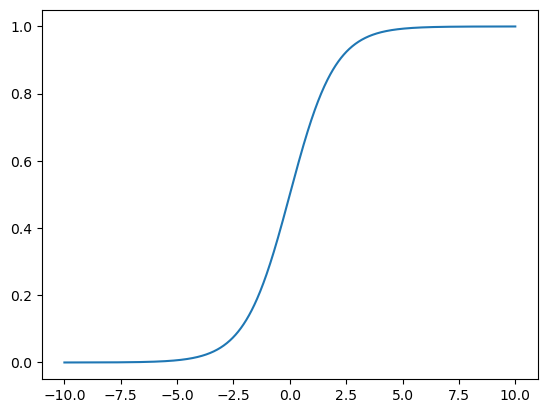

In [23]:
plot_function(sigmoid, -10, 10)

In [24]:
def make_logistic(a, b, c):
    def l(x,p):
        return sigmoid(a*x + b*p -c)
    return l

In [25]:
def simple_logistic_cost(a, b, c):
    l = make_logistic(a, b, c)
    errors = [abs(is_bmw-l(x,p)) for x,p,is_bmw in scaled_car_data]
    return sum(error)

In [26]:
from math import log
-log(0.01)

4.605170185988091

In [27]:
from math import log
-log(0.001)

6.907755278982137

In [28]:
def point_cost(l, x, p, is_bmw):
    wrong = 1 - is_bmw
    return -log(abs(wrong-l(x,p)))

def logistic_cost(a, b, c):
    l = make_logistic(a, b, c)
    errors = [point_cost(l, x, p, is_bmw) for x, p,is_bmw in scaled_car_data]
    return sum(errors)

In [29]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff
    
    # black by default
    if 'c' not in kwargs:
        kwargs['c'] = 'k'
        
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

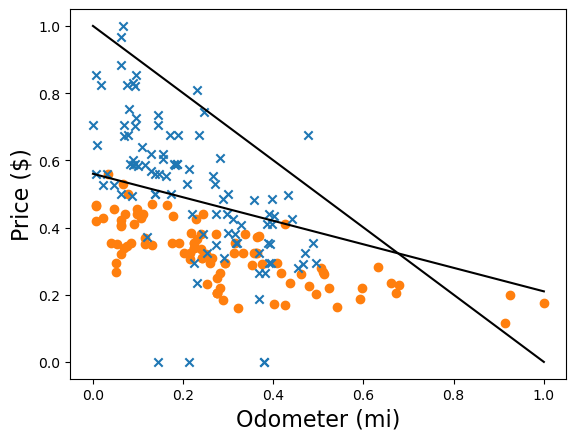

In [30]:
plot_data(scaled_car_data)
plot_line(0.35,1.0,0.56)
plot_line(1,1,1)

In [31]:
logistic_cost(0.35,1.0,0.56)

130.9249074870046

In [32]:
logistic_cost(1,1,1)

135.56446830870462

In [33]:
def k(x, y):
    return sigmoid(x**2 + y**2 -1)

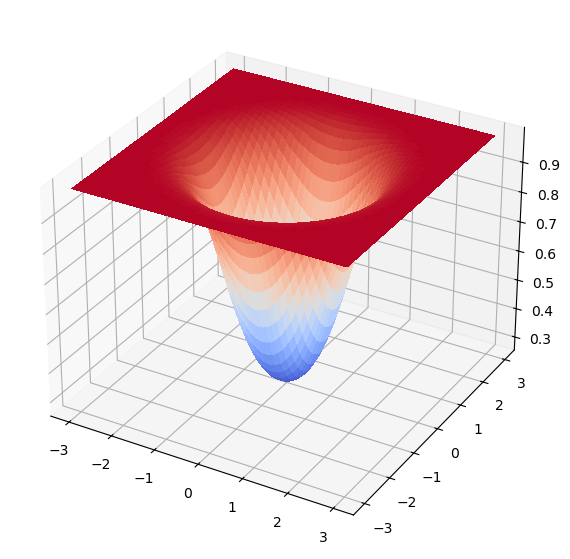

In [34]:
plot_scalar_field(k, -3, 3, -3, 3)

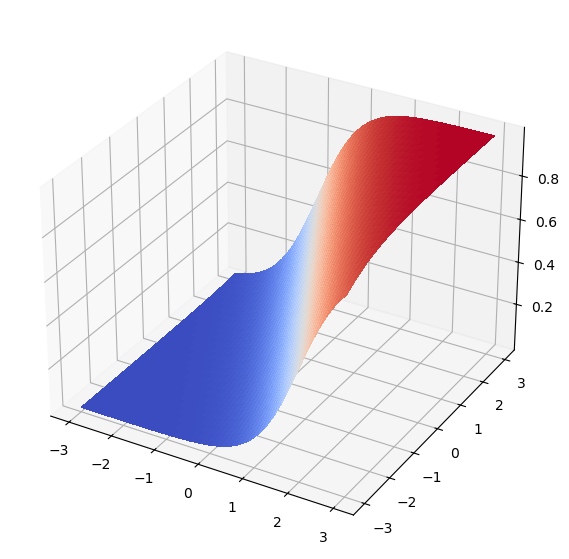

In [69]:
plot_scalar_field(lambda x,y: sigmoid(2*x+y-1), -3, 3, -3, 3)

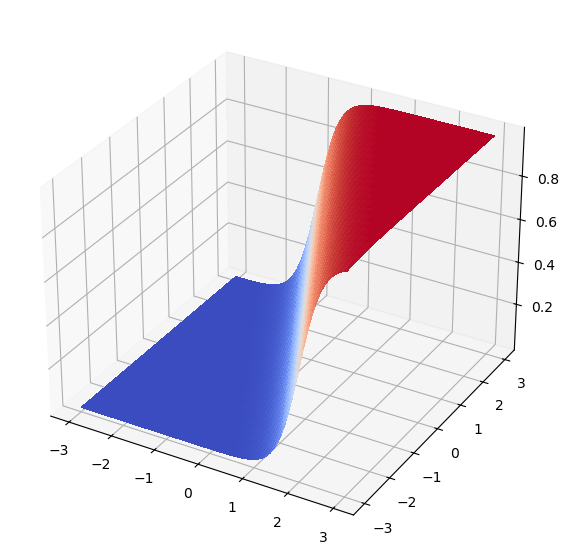

In [71]:
plot_scalar_field(lambda x,y: sigmoid(4*x+2*y-2), -3, 3, -3, 3)

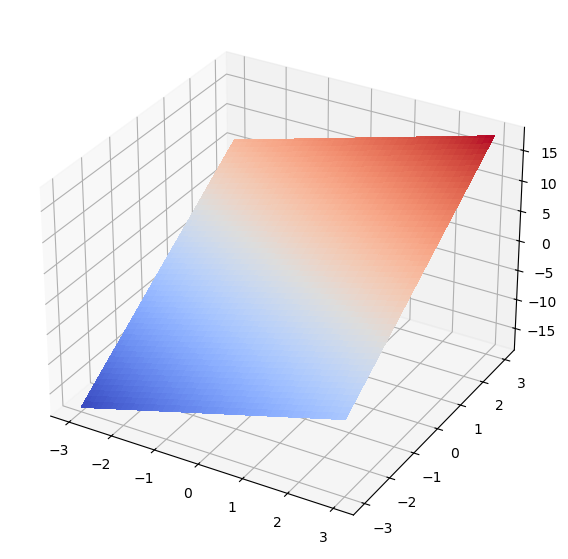

In [77]:
plot_scalar_field(lambda x,y: 2*x+4*y, -3, 3, -3, 3)

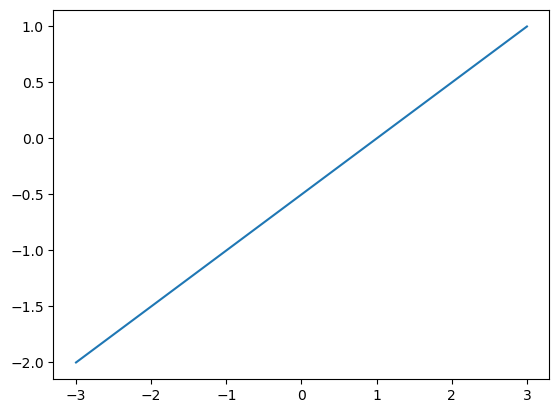

In [83]:
plot_function(lambda x: 1/2*x-1/2, -3, 3)

In [85]:
from math import sqrt
def length(v):
    return sqrt(sum([vi*vi for vi in v]))

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [97]:
def approx_gradient3(f, x0, y0, z0, dx=1e-6):
    partial_x = approx_derivative(lambda x: f(x,y0,z0), x0, dx=dx)
    partial_y = approx_derivative(lambda y: f(x0, y, z0), y0, dx=dx)
    partial_z = approx_derivative(lambda z: f(x0, y0, z), z0, dx=dx)
    return (partial_x, partial_y, partial_z)

In [125]:
def gradient_descent3(f, xstart, ystart, zstart, tolerance=1e-6, max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f, x, y, z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f, x, y, z)
        steps += 1
    print(steps)
    return x, y, z

In [105]:
gradient_descent3(logistic_cost,1, 1, 1, max_steps=100)

(0.21114493446923963, 5.045439729273302, 2.126012256718192)

In [107]:
gradient_descent3(logistic_cost,1, 1, 1, max_steps=200)

(0.8845715270351315, 6.657543188128991, 2.9550572857804425)

In [109]:
gradient_descent3(logistic_cost,1, 1, 1, max_steps=300)

(1.5212679379394272, 7.702184002581072, 3.5405166986303636)

In [111]:
gradient_descent3(logistic_cost,1, 1, 1, max_steps=8000)

(3.716700420305167, 11.42206260708127, 5.596878473105733)

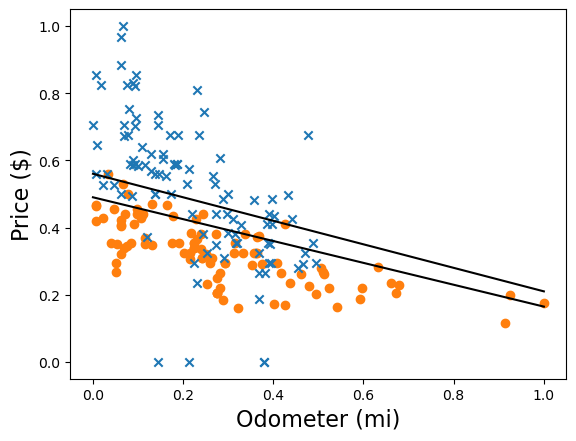

In [113]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(3.716700420305167,11.4220626070812,5.59687847310573)

In [115]:
def best_logistic_classifier(x,p):
    l = make_logistic(3.716700420305167,11.4220626070812,5.59687847310573)
    if l(x,p) > 0.5:
        return 1
    else:
        return 0

In [117]:
test_classifier(best_logistic_classifier, scaled_car_data)

0.8

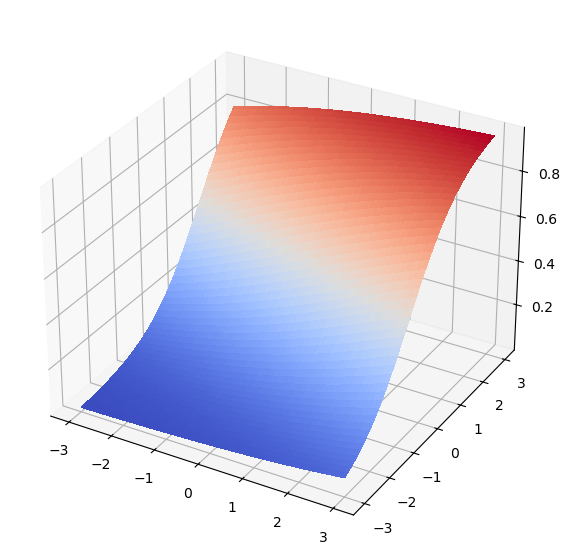

In [119]:
plot_scalar_field(lambda x,p: sigmoid(0.35*x+p-0.56), -3, 3, -3, 3)

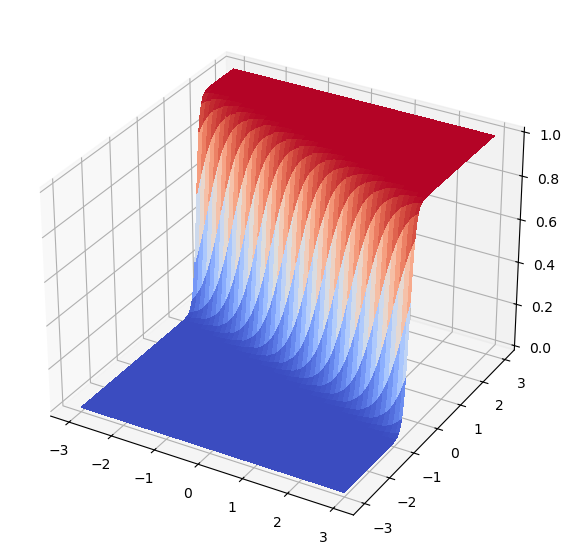

In [123]:
plot_scalar_field(lambda x,p: sigmoid(3.716700420305167*x+11.4220626070812*p-5.59687847310573), -3, 3, -3, 3)